In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mosmeddata-chest-ct-scans-with-covid19/MosMedData Chest CT Scans with COVID-19 Related Findings COVID19_1110 1.0/dataset_registry.xlsx
/kaggle/input/mosmeddata-chest-ct-scans-with-covid19/MosMedData Chest CT Scans with COVID-19 Related Findings COVID19_1110 1.0/LICENSE
/kaggle/input/mosmeddata-chest-ct-scans-with-covid19/MosMedData Chest CT Scans with COVID-19 Related Findings COVID19_1110 1.0/README_RU.md
/kaggle/input/mosmeddata-chest-ct-scans-with-covid19/MosMedData Chest CT Scans with COVID-19 Related Findings COVID19_1110 1.0/README_EN.pdf
/kaggle/input/mosmeddata-chest-ct-scans-with-covid19/MosMedData Chest CT Scans with COVID-19 Related Findings COVID19_1110 1.0/README_EN.md
/kaggle/input/mosmeddata-chest-ct-scans-with-covid19/MosMedData Chest CT Scans with COVID-19 Related Findings COVID19_1110 1.0/README_RU.pdf
/kaggle/input/mosmeddata-chest-ct-scans-with-covid19/MosMedData Chest CT Scans with COVID-19 Related Findings COVID19_1110 1.0/studies/CT-4/study_1110.nii

In [6]:
# total mask
print("total masks:")
!ls "/kaggle/input/mosmeddata-chest-ct-scans-with-covid19/MosMedData Chest CT Scans with COVID-19 Related Findings COVID19_1110 1.0/masks/" | wc -l

total masks:
50


In [9]:
# Samples in CT0, CT1, CT2, CT3, and CT4 (respectivey):
print("Samples in CT0, CT1, CT2, CT3, and CT4 (respectivey):")
!ls "/kaggle/input/mosmeddata-chest-ct-scans-with-covid19/MosMedData Chest CT Scans with COVID-19 Related Findings COVID19_1110 1.0/studies/CT-0" | wc -l
!ls "/kaggle/input/mosmeddata-chest-ct-scans-with-covid19/MosMedData Chest CT Scans with COVID-19 Related Findings COVID19_1110 1.0/studies/CT-1" | wc -l
!ls "/kaggle/input/mosmeddata-chest-ct-scans-with-covid19/MosMedData Chest CT Scans with COVID-19 Related Findings COVID19_1110 1.0/studies/CT-2" | wc -l
!ls "/kaggle/input/mosmeddata-chest-ct-scans-with-covid19/MosMedData Chest CT Scans with COVID-19 Related Findings COVID19_1110 1.0/studies/CT-3" | wc -l
!ls "/kaggle/input/mosmeddata-chest-ct-scans-with-covid19/MosMedData Chest CT Scans with COVID-19 Related Findings COVID19_1110 1.0/studies/CT-4" | wc -l

Samples in CT0, CT1, CT2, CT3, and CT4 (respectivey):
254
684
125
45
2


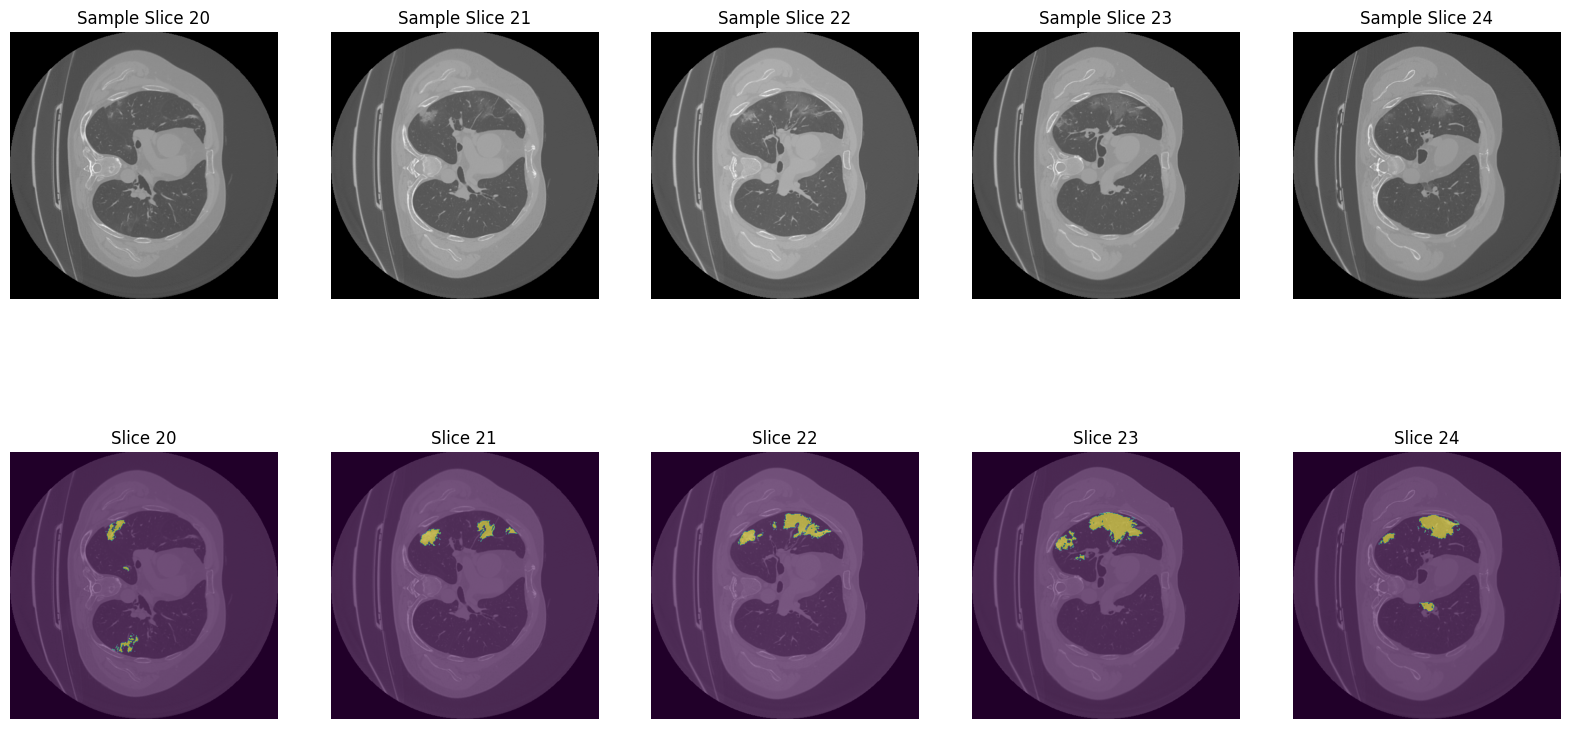

In [18]:
import os
import nibabel as nib
import matplotlib.pyplot as plt

base_dir = '/kaggle/input/mosmeddata-chest-ct-scans-with-covid19/MosMedData Chest CT Scans with COVID-19 Related Findings COVID19_1110 1.0'

mask_dir = os.path.join(base_dir, 'masks')
sample_dir = os.path.join(base_dir, 'studies', 'CT-1')

sample_file = os.path.join(sample_dir, 'study_0255.nii')
mask_file = os.path.join(mask_dir, 'study_0255_mask.nii')

sample_data = nib.load(sample_file).get_fdata()
mask_data = nib.load(mask_file).get_fdata()

fig, ax = plt.subplots(2, 5, figsize=(20, 10))

for i, slice_idx in enumerate(range(20, 25)):
    ax[0, i].imshow(sample_data[:, :, slice_idx], cmap='gray')
    ax[0, i].set_title(f'Sample Slice {slice_idx}')
    ax[0, i].axis('off')

    ax[1, i].imshow(sample_data[:, :, slice_idx], cmap='gray')
    ax[1, i].imshow(mask_data[:, :, slice_idx], cmap='viridis', alpha=0.5)
    ax[1, i].set_title(f'Slice {slice_idx}')
    ax[1, i].axis('off')

plt.show()

In [ ]:
import os
import csv

base_dir = '/kaggle/input/mosmeddata-chest-ct-scans-with-covid19/MosMedData Chest CT Scans with COVID-19 Related Findings COVID19_1110 1.0'

mask_dir = os.path.join(base_dir, 'masks')
sample_base_dir = os.path.join(base_dir, 'studies')

mask_sample_dict = {}

mask_files = os.listdir(mask_dir)
for i, mask_file in enumerate(mask_files):
    if i >= 50:
        break

    sample_file_base = os.path.splitext(mask_file)[0][:-6]
    for subdir in os.listdir(sample_base_dir):
        sample_dir = os.path.join(sample_base_dir, subdir)
        if os.path.exists(os.path.join(sample_dir, f"{sample_file_base}.nii")):
            mask_sample_dict[mask_file] = os.path.join(sample_dir, f"{sample_file_base}.nii")
            break

csv_path = os.path.join('/kaggle', 'working', 'mask_sample_pairs.csv')
with open(csv_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Mask File', 'Sample File'])
    for mask_file, sample_file in mask_sample_dict.items():
        writer.writerow([mask_file, sample_file])

print("Head of the CSV file:")
with open(csv_path, 'r') as csvfile:
    reader = csv.reader(csvfile)
    head = [next(reader) for _ in range(5)]
    for row in head:
        print(', '.join(row))

In [24]:
cp -r /kaggle/input/mosmeddata-chest-ct-scans-with-covid19/MosMedData\ Chest\ CT\ Scans\ with\ COVID-19\ Related\ Findings\ COVID19_1110\ 1.0/masks /kaggle/working/

In [25]:
import os
import shutil
import zipfile

src_dir = '/kaggle/working/masks'
zip_file_path = '/kaggle/working/masks.zip'

with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zip_file:
    for root, dirs, files in os.walk(src_dir):
        for file in files:
            file_path = os.path.join(root, file)
            zip_file.write(file_path)

print("Masks directory zipped successfully!")

Masks directory zipped successfully!


In [26]:
import os
import shutil

src_dir = '/kaggle/input/mosmeddata-chest-ct-scans-with-covid19/MosMedData Chest CT Scans with COVID-19 Related Findings COVID19_1110 1.0/studies/CT-1'
dst_dir = '/kaggle/working/study'

os.makedirs(dst_dir, exist_ok=True)

for i in range(255, 305):
    src_file = os.path.join(src_dir, f'study_{i:04d}.nii')
    dst_file = os.path.join(dst_dir, f'study_{i:04d}.nii')
    shutil.copy(src_file, dst_file)

print("Files copied successfully!")

Files copied successfully!


In [36]:
src_dir = '/kaggle/working/study'
zip_file_path = '/kaggle/working/study.zip'

with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zip_file:
    for root, dirs, files in os.walk(src_dir):
        for file in files:
            file_path = os.path.join(root, file)
            zip_file.write(file_path)

print("Study directory zipped successfully!")

Study directory zipped successfully!
